In [1]:
# Imports and defines.
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from langdetect import detect, DetectorFactory
from scipy.stats import pearsonr

DATA_PATH = "Data/" # path to the folder with data

In [12]:
# Loading dataset with BTC price [Hourly].
btc_price = pd.read_csv(DATA_PATH + 'BTC-Hourly.csv', low_memory = False, lineterminator='\n', usecols = ['date','open'])
btc_price.rename(columns = {'open':'price'}, inplace = True)
btc_price.rename(columns = {'date':'timestamp'}, inplace = True)
btc_price['timestamp'] = pd.to_datetime(btc_price['timestamp']).dt.tz_localize(None)
btc_price = btc_price.sort_values(by=['timestamp'], ascending=True, ignore_index=True)

# Filter for selected period of time.
btc_price = btc_price[btc_price['timestamp'].dt.year == 2019]
btc_price = btc_price.reset_index(drop=True)
print(btc_price.info)

<bound method DataFrame.info of                timestamp    price
0    2019-01-01 00:00:00  3693.30
1    2019-01-01 01:00:00  3693.83
2    2019-01-01 02:00:00  3681.18
3    2019-01-01 03:00:00  3678.24
4    2019-01-01 04:00:00  3681.10
...                  ...      ...
8755 2019-12-31 19:00:00  7139.78
8756 2019-12-31 20:00:00  7146.74
8757 2019-12-31 21:00:00  7148.02
8758 2019-12-31 22:00:00  7160.99
8759 2019-12-31 23:00:00  7171.33

[8760 rows x 2 columns]>


In [3]:
# Checking for missing values in the entire dataset
missing_values = btc_price.isnull().sum()

# Printing the number of missing values for each column
print("Number of missing values in each column:")
print(missing_values)

# Checking if there are any missing values in the dataset
if missing_values.any():
    print("There are missing values in the dataset.")
else:
    print("No missing values found in the dataset.")

Number of missing values in each column:
timestamp    0
price        0
dtype: int64
No missing values found in the dataset.


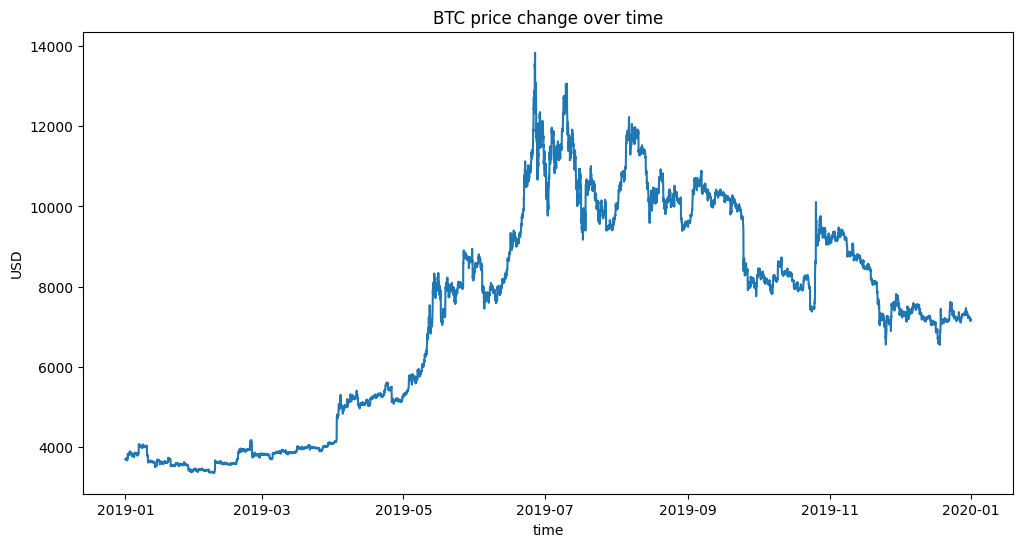

In [4]:
# Chart of BTC price change over time
plt.figure(figsize=(12,6))
plt.plot(btc_price['timestamp'], btc_price['price'])
plt.title("BTC price change over time")
plt.xlabel('time')
plt.ylabel('USD')
plt.show()

In [5]:
# Compute daily returns
btc_price['returns'] = round(100*btc_price['price'].pct_change().dropna(),3)
btc_price = btc_price.dropna()

# Compute squared returns
btc_price['squared_returns'] = round(btc_price['returns'] ** 2, 3)

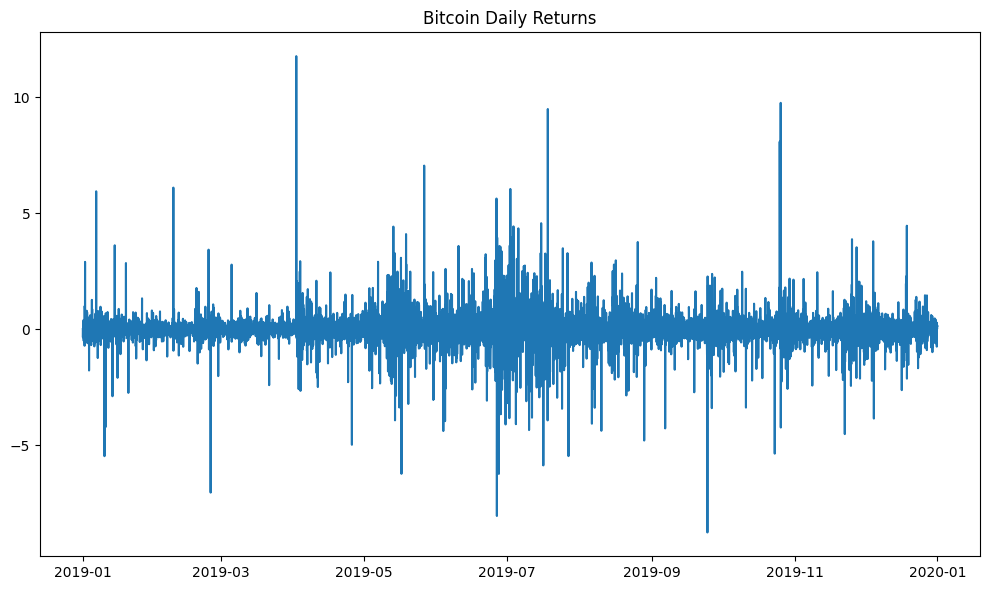

In [6]:
# Plot returns
plt.figure(figsize=(10,6))
plt.plot(btc_price['timestamp'], btc_price['returns'])
plt.title("Bitcoin Daily Returns")
plt.tight_layout()
plt.show()

In [7]:
# Filter for selected period of time.
TIME = (btc_price['timestamp'].dt.month == 6)  & (btc_price['timestamp'].dt.year == 2019)
btc_price = btc_price[TIME]
btc_price = btc_price.reset_index(drop=True)
print(btc_price.info)

<bound method DataFrame.info of               timestamp     price  returns  squared_returns
0   2019-06-01 00:00:00   8547.20    0.447            0.200
1   2019-06-01 01:00:00   8587.74    0.474            0.225
2   2019-06-01 02:00:00   8548.95   -0.452            0.204
3   2019-06-01 03:00:00   8539.81   -0.107            0.011
4   2019-06-01 04:00:00   8541.80    0.023            0.001
..                  ...       ...      ...              ...
715 2019-06-30 19:00:00  11178.26   -0.886            0.785
716 2019-06-30 20:00:00  11231.06    0.472            0.223
717 2019-06-30 21:00:00  11380.00    1.326            1.758
718 2019-06-30 22:00:00  11262.60   -1.032            1.065
719 2019-06-30 23:00:00  10911.33   -3.119            9.728

[720 rows x 4 columns]>


In [8]:
#  Saving dataframe to CSV
btc_price.to_csv(DATA_PATH + 'BTC_data.csv', index=False)

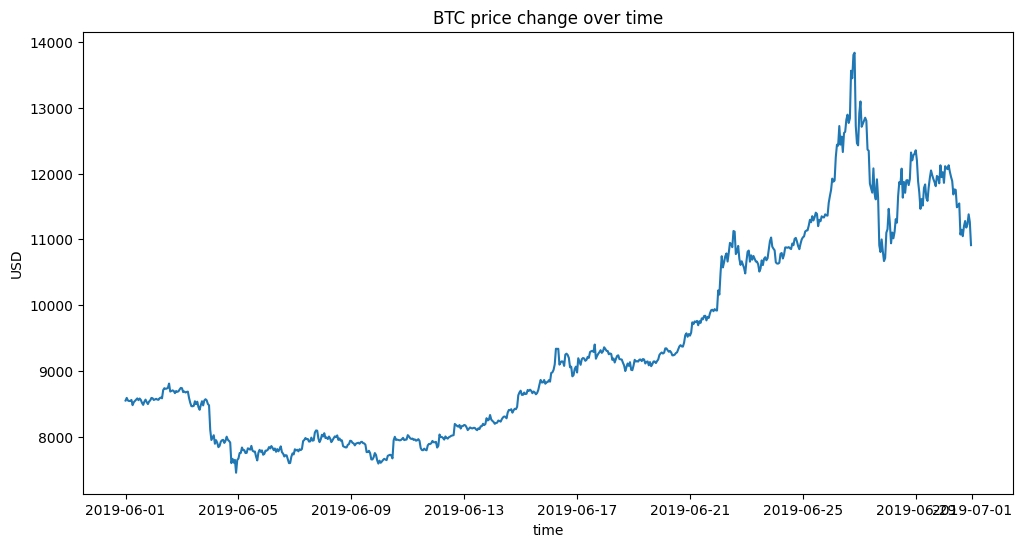

In [9]:
# Chart of BTC price change over time
plt.figure(figsize=(12,6))
plt.plot(btc_price['timestamp'], btc_price['price'])
plt.title("BTC price change over time")
plt.xlabel('time')
plt.ylabel('USD')
plt.show()